In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lailedinhduc","key":"00f7ce269f777024e139663bc50e6cb8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio
!unzip ravdess-emotional-speech-audio.zip

Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 91% 392M/429M [00:00<00:00, 516MB/s]
100% 429M/429M [00:00<00:00, 520MB/s]
Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-

In [ ]:
!kaggle datasets download -d piyushagni5/berlin-database-of-emotional-speech-emodb
!unzip berlin-database-of-emotional-speech-emodb.zip

Dataset URL: https://www.kaggle.com/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb
License(s): copyright-authors
  0% 0.00/38.0M [00:00<?, ?B/s]
100% 38.0M/38.0M [00:00<00:00, 1.31GB/s]
Archive:  berlin-database-of-emotional-speech-emodb.zip
  inflating: wav/03a01Fa.wav         
  inflating: wav/03a01Nc.wav         
  inflating: wav/03a01Wa.wav         
  inflating: wav/03a02Fc.wav         
  inflating: wav/03a02Nc.wav         
  inflating: wav/03a02Ta.wav         
  inflating: wav/03a02Wb.wav         
  inflating: wav/03a02Wc.wav         
  inflating: wav/03a04Ad.wav         
  inflating: wav/03a04Fd.wav         
  inflating: wav/03a04Lc.wav         
  inflating: wav/03a04Nc.wav         
  inflating: wav/03a04Ta.wav         
  inflating: wav/03a04Wc.wav         
  inflating: wav/03a05Aa.wav         
  inflating: wav/03a05Fc.wav         
  inflating: wav/03a05Nd.wav         
  inflating: wav/03a05Tc.wav         
  inflating: wav/03a05Wa.wav         
  inflating: wav/03a

In [ ]:
Ravdess = "/content/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # vì họ là 20 diễn viên khác nhau trong thư mục trước đó của chúng tôi, chúng tôi cần giải nén tệp cho từng diễn viên.
    actor = os.listdir(os.path.join(Ravdess, dir))
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # Phần thứ ba trong tên thể hiện cảm xúc trong đoạn thoại.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(os.path.join(Ravdess, dir), file))

# dataframe cho cảm xúc của dữ liệu
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe cho đường dẫn của dữ liệu.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Chuyển đổi giá trị interger sang nhãn cảm xúc.
#Ở đây có 2 nhãn là thông thường và bình tĩnh, vì vậy tôi đã gộp chúng lại làm 1.
Ravdess_df.replace({'Emotions': {
    1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
    5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'
}}, inplace=True)

Ravdess_df.head(10)

,Emotions,Path
0,surprise,/content/audio_speech_actors_01-24/Actor_09/03...
1,fear,/content/audio_speech_actors_01-24/Actor_09/03...
2,surprise,/content/audio_speech_actors_01-24/Actor_09/03...
3,disgust,/content/audio_speech_actors_01-24/Actor_09/03...
4,happy,/content/audio_speech_actors_01-24/Actor_09/03...
5,surprise,/content/audio_speech_actors_01-24/Actor_09/03...
6,neutral,/content/audio_speech_actors_01-24/Actor_09/03...
7,sad,/content/audio_speech_actors_01-24/Actor_09/03...
8,surprise,/content/audio_speech_actors_01-24/Actor_09/03...
9,angry,/content/audio_speech_actors_01-24/Actor_09/03...


In [ ]:
Ravdess_df.Emotions.value_counts()

,count
Emotions,
neutral,288
fear,192
surprise,192
disgust,192
happy,192
sad,192
angry,192


In [ ]:
emo = "/content/wav"
emo_directory_list = os.listdir(emo)

file_emotion = []
file_path = []
for dir in emo_directory_list:
    if dir.endswith(".wav"):
      label = dir.split(".")[0][-2]
      file_path.append(os.path.join(emo, dir))
      file_emotion.append(label)

# dataframe cho cảm xúc của dữ liệu
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe cho đường dẫn của dữ liệu.
path_df = pd.DataFrame(file_path, columns=['Path'])
emo_df = pd.concat([emotion_df, path_df], axis=1)

# Chuyển đổi giá trị interger sang nhãn cảm xúc.
#Ở đây có 2 nhãn là thông thường và bình tĩnh, vì vậy tôi đã gộp chúng lại làm 1.
emo_df.replace({'Emotions': {'W':'angry', 'L':'boredom', 'E':'disgust', 'A':'fear', 'F':'happy', 'T' : 'sad', 'N' : 'neutral'}}, inplace=True)


emo_df.head(10)

,Emotions,Path
0,angry,/content/wav/14a04Wb.wav
1,fear,/content/wav/03a04Ad.wav
2,boredom,/content/wav/10b01Lb.wav
3,happy,/content/wav/15a07Fb.wav
4,sad,/content/wav/13b03Td.wav
5,fear,/content/wav/14a05Ac.wav
6,angry,/content/wav/09b10Wa.wav
7,neutral,/content/wav/08a05Nb.wav
8,happy,/content/wav/03a07Fa.wav
9,neutral,/content/wav/15b01Na.wav


In [ ]:
data_path = pd.concat([Ravdess_df, emo_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()
data_path.Emotions.value_counts()

,count
Emotions,
neutral,367
angry,319
happy,263
fear,261
sad,254
disgust,238
surprise,192
boredom,81


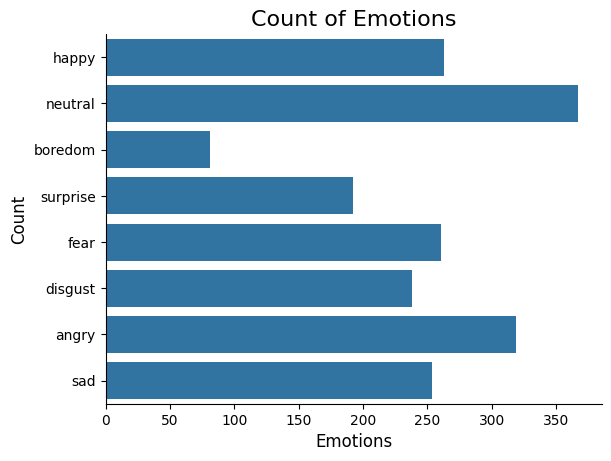

In [ ]:
# Suffle Data Nếu muốn
data_path = data_path.sample(frac=1, random_state=42).reset_index(drop=True)
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

# Feature Extraction

In [ ]:
import librosa
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

### 1. On One Sample

In [ ]:
def get_sound_data(path, target_sr=44100):
  """
  Input:
    - path: path to audio file
    - sr: target sample rate
  Output:
    - 1st element: sound data (array of waveform values), 1D if mono,
                   2D (frames x channels) if stero
    - 2nd element: sample rate (the current sample rate)
  """
  data, orig_sr = sf.read(path)
  data_resample = librosa.resample(data, orig_sr=orig_sr, target_sr=target_sr)

  # Get average if audio is muilti channels
  if len(data_resample.shape) > 1:
    data_resample = np.average(data_resample, axis=0)
  return data_resample, target_sr

  # End get_sound_data function

In [ ]:
# Check get_sound_data function on one sample
data, sr = get_sound_data("/content/EmoDB/03a01Fa.wav")
print("Sound data:", data)
print("Data Shape:", data.shape)
print("Current Sample Rate:", sr)

LibsndfileError: Error opening '/content/EmoDB/03a01Fa.wav': System error.

In [ ]:
def windows(data, window_size):
  """
  Breake the sample into smaller, half overlaping and equal samples
  to satisfy the balanced in each sample's length.
  Input:
    - data: sound data
    - window_size: size of each smaller sample
  Yield:
    - start: start index of each sample
    - end: end index of each sample
  """
  start = 0
  while start + window_size < len(data):
    yield start, start + window_size
    start += (window_size // 2)

# End windows function

In [ ]:
# Check windows function on one sample
for start, end in windows(data=data, window_size=32256):
  print(start, end)

NameError: name 'data' is not defined

Có một vấn đề ở đây là nó vượt quá kích thước của data

In [ ]:
label_to_index = {
    'fear': 0,
    'disgust': 1,
    'happy': 2,
    'angry': 3,
    'surprise': 4,
    'sad': 5,
    'neutral': 6,
    'boredom': 7
}


Đang lấy mfcc thay cho log_mel

In [ ]:
def extract_features(df, bands=64, frames=64, hop_length=512, n_fft=1024, target_sr=44100):
  """
  Input:
    - frames: Number of frames in each window
    - n_fft: Length of each frame
    - hop_length: Distance from the start index of current frame to the next one
    - bands: Number of mel bands to generate
  Output:

  """
  # Declare features's variables
  window_size = hop_length * (frames - 1)
  log_specgrams_full = []
  log_specgrams_hp = []
  mfcc_specgrams = []
  class_labels = []


  for row in tqdm(df.itertuples()):
    if row.Path.endswith(".wav"):
      label = label_to_index[row.Emotions]
      # Get each feature
      data, sr = get_sound_data(row.Path, target_sr=target_sr)
      for start, end in windows(data, window_size):

        signal = data[start:end]

        # Add label
        class_labels.append(label)

        # Get log-scaled mel-spectrogram feature - USED
        melspec_full = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=bands, n_fft=n_fft, hop_length=hop_length)
        logspec_full = librosa.amplitude_to_db(melspec_full)
        log_specgrams_full.append(logspec_full)
        # logspec_full's shape is (n_mels, n_frames)

        # Get mfcc feature
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=bands)
        mfcc_specgrams.append(mfcc)
        # mfcc's shape is (n_mfcc, n_frames)

        # Get chroma - USED
        chroma = librosa.feature.chroma_stft(y=signal, sr=sr, n_chroma=bands)
        log_specgrams_hp.append(chroma)
        # chroma's shape is (n_chroma, n_frames)

  # Reshape 4D input (n_windows, n_bands, n_frames, n_features)
  log_specgrams_full = np.asarray(log_specgrams_full).reshape(len(log_specgrams_full), bands, frames, 1)
  log_specgrams_hp = np.asarray(log_specgrams_hp).reshape(len(log_specgrams_hp), bands, frames, 1)
  mfcc_specgrams = np.asarray(mfcc_specgrams).reshape(len(mfcc_specgrams), bands, frames, 1)

  # Combined USED features into a feature map
  features = np.concatenate((mfcc_specgrams, np.zeros(np.shape(log_specgrams_full)), np.zeros(np.shape(log_specgrams_full))), axis=3)

  # Create the third feature map which is the delta (derivative) of the log-scaled mel-spectrogram - USED
  for i in range(features.shape[0]):
    features[i, :, :, 2] = librosa.feature.delta(features[i, :, :, 0])
    features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0], order=2)

  return np.array(features), np.array(class_labels)

# End extract_features function

In [ ]:
features, labels = extract_features(data_path, bands=128, frames=128)
print(features.shape)
print(labels.shape)

1975it [10:42,  3.08it/s]


(6256, 128, 128, 3)
(6256,)


# Elite CNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

# ==== Configuration ====
BATCH_SIZE = 4
LR = 1e-4
EPOCHS = 50
VAL_SPLIT = 0.2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==== Prepare data ====
# Load your actual data here
# features = np.load('features.npy')
# labels = np.load('labels.npy')

# Dummy placeholders for testing purposes (remove when using real data)
# features = np.random.rand(3000, 128, 128, 5).astype(np.float32)
# labels = np.random.randint(0, 7, size=(3000,)).astype(np.int64)

features = features.astype(np.float32)
labels = labels.astype(np.int64).reshape(-1)

X = torch.from_numpy(features).permute(0, 3, 1, 2).float()  # (N, C, H, W)
y = torch.from_numpy(labels)

dataset = TensorDataset(X, y)
val_size = int(len(dataset) * VAL_SPLIT)
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, drop_last=True)

# ==== Simple CNN Model ====
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)

        self.conv2 = nn.Conv2d(256, 256, kernel_size=5, stride=1, padding=2)
        self.bn2 = nn.BatchNorm2d(256)
        self.pool2 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)

        self.conv3 = nn.Conv2d(256, 128, kernel_size=5, stride=1, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)
        self.drop3 = nn.Dropout(0.2)

        self.conv4 = nn.Conv2d(128, 64, kernel_size=5, stride=1, padding=2)
        self.bn4 = nn.BatchNorm2d(64)
        self.pool4 = nn.MaxPool2d(kernel_size=5, stride=2, padding=2)

        # Tính toán kích thước đầu vào Flatten
        # Input: (3, 128, 128) → Output sau các lớp: (?, 64, 8, 8)
        self.flatten_dim = 64 * 8 * 8

        self.fc1 = nn.Linear(self.flatten_dim, 32)
        self.bn_fc1 = nn.BatchNorm1d(32)
        self.drop_fc1 = nn.Dropout(0.25)

        self.fc2 = nn.Linear(32, 8)  # output = 7 classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = self.drop3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool4(x)

        x = x.view(-1, self.flatten_dim)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.drop_fc1(x)

        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


model = CNNModel().to(DEVICE)

# ==== Loss and optimizer ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# ==== Training & evaluation functions ====
def train_epoch(loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == targets).sum().item()
        total += targets.size(0)
    return running_loss / total, correct / total


def eval_epoch(loader):
    model.eval()
    running_loss, all_preds, all_targets = 0.0, [], []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    acc = (np.array(all_preds) == np.array(all_targets)).mean()
    f1 = f1_score(all_targets, all_preds, average='macro')
    return running_loss / len(all_targets), acc, f1, all_preds, all_targets

# ==== Main loop ====
best_val_acc = 0.0
best_val_f1 = 0.0
train_losses, val_losses = [], []
train_accs, val_accs, val_f1s = [], [], []

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_epoch(train_loader)
    val_loss, val_acc, val_f1, _, _ = eval_epoch(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch}/{EPOCHS}"
          f" - Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}"
          f" - Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_simple_cnn_acc.pth')
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'best_simple_cnn_f1.pth')

print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Best Validation F1 Score: {best_val_f1:.4f}")

# ==== Plotting ====
plt.figure()
plt.plot(range(1, EPOCHS+1), train_accs, label='Train Acc')
plt.plot(range(1, EPOCHS+1), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, EPOCHS+1), val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score')
plt.legend()
plt.show()

# ==== Confusion Matrix on Validation Set ====
_, _, _, all_preds, all_targets = eval_epoch(val_loader)
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [str(i) for i in range(cm.shape[0])]
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Epoch 1/50 - Train loss: 1.9480, Train acc: 0.2478 - Val loss: 1.8394, Val acc: 0.2756, Val F1: 0.2132
Epoch 2/50 - Train loss: 1.8629, Train acc: 0.2852 - Val loss: 1.7811, Val acc: 0.2660, Val F1: 0.2021
Epoch 3/50 - Train loss: 1.8247, Train acc: 0.2974 - Val loss: 1.7983, Val acc: 0.3005, Val F1: 0.1937
Epoch 4/50 - Train loss: 1.7895, Train acc: 0.3124 - Val loss: 1.6267, Val acc: 0.3966, Val F1: 0.2942
Epoch 5/50 - Train loss: 1.7229, Train acc: 0.3463 - Val loss: 1.6061, Val acc: 0.4054, Val F1: 0.3333
Epoch 6/50 - Train loss: 1.6947, Train acc: 0.3469 - Val loss: 1.4985, Val acc: 0.4655, Val F1: 0.3976
Epoch 7/50 - Train loss: 1.6391, Train acc: 0.3805 - Val loss: 1.5338, Val acc: 0.4183, Val F1: 0.3766
Epoch 8/50 - Train loss: 1.6070, Train acc: 0.3905 - Val loss: 1.4419, Val acc: 0.4920, Val F1: 0.4451
Epoch 9/50 - Train loss: 1.5507, Train acc: 0.4343 - Val loss: 1.4603, Val acc: 0.4319, Val F1: 0.3791
Epoch 10/50 - Train loss: 1.5192, Train acc: 0.4446 - Val loss: 1.2967, V

KeyboardInterrupt: 

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

# ==== Configuration ====
BATCH_SIZE = 4
LR = 1e-4
EPOCHS = 50
VAL_SPLIT = 0.2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==== Prepare data ====
# Load your actual data here
# features = np.load('features.npy')
# labels = np.load('labels.npy')

# Dummy placeholders for testing purposes (remove when using real data)
# features = np.random.rand(3000, 128, 128, 5).astype(np.float32)
# labels = np.random.randint(0, 7, size=(3000,)).astype(np.int64)

features = features.astype(np.float32)
labels = labels.astype(np.int64).reshape(-1)

X = torch.from_numpy(features).permute(0, 3, 1, 2).float()  # (N, C, H, W)
y = torch.from_numpy(labels)

dataset = TensorDataset(X, y)
val_size = int(len(dataset) * VAL_SPLIT)
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# ==== Simple CNN Model ====
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),  # giảm overfitting
            nn.Dropout(0.4)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 7)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)



model = ImprovedCNN().to(DEVICE)

# ==== Loss and optimizer ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# ==== Training & evaluation functions ====
def train_epoch(loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == targets).sum().item()
        total += targets.size(0)
    return running_loss / total, correct / total


def eval_epoch(loader):
    model.eval()
    running_loss, all_preds, all_targets = 0.0, [], []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    acc = (np.array(all_preds) == np.array(all_targets)).mean()
    f1 = f1_score(all_targets, all_preds, average='macro')
    return running_loss / len(all_targets), acc, f1, all_preds, all_targets

# ==== Main loop ====
best_val_acc = 0.0
best_val_f1 = 0.0
train_losses, val_losses = [], []
train_accs, val_accs, val_f1s = [], [], []

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_epoch(train_loader)
    val_loss, val_acc, val_f1, _, _ = eval_epoch(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch}/{EPOCHS}"
          f" - Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}"
          f" - Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_simple_cnn_acc.pth')
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'best_simple_cnn_f1.pth')

print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Best Validation F1 Score: {best_val_f1:.4f}")

# ==== Plotting ====
plt.figure()
plt.plot(range(1, EPOCHS+1), train_accs, label='Train Acc')
plt.plot(range(1, EPOCHS+1), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, EPOCHS+1), val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score')
plt.legend()
plt.show()

# ==== Confusion Matrix on Validation Set ====
_, _, _, all_preds, all_targets = eval_epoch(val_loader)
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [str(i) for i in range(cm.shape[0])]
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Epoch 1/100 - Train loss: 1.9205, Train acc: 0.2446 - Val loss: 1.7988, Val acc: 0.2958, Val F1: 0.1347
Epoch 2/100 - Train loss: 1.7950, Train acc: 0.3029 - Val loss: 1.6213, Val acc: 0.3645, Val F1: 0.2467
Epoch 3/100 - Train loss: 1.7028, Train acc: 0.3489 - Val loss: 1.5545, Val acc: 0.4109, Val F1: 0.3510
Epoch 4/100 - Train loss: 1.6438, Train acc: 0.3740 - Val loss: 1.4669, Val acc: 0.4804, Val F1: 0.4368
Epoch 5/100 - Train loss: 1.5741, Train acc: 0.3950 - Val loss: 1.3513, Val acc: 0.4884, Val F1: 0.4536
Epoch 6/100 - Train loss: 1.5317, Train acc: 0.4168 - Val loss: 1.3044, Val acc: 0.5132, Val F1: 0.4706
Epoch 7/100 - Train loss: 1.4630, Train acc: 0.4456 - Val loss: 1.3034, Val acc: 0.4940, Val F1: 0.4354
Epoch 8/100 - Train loss: 1.4222, Train acc: 0.4623 - Val loss: 1.2086, Val acc: 0.5500, Val F1: 0.5172
Epoch 9/100 - Train loss: 1.3856, Train acc: 0.4883 - Val loss: 1.5913, Val acc: 0.4037, Val F1: 0.3089
Epoch 10/100 - Train loss: 1.3514, Train acc: 0.4909 - Val loss:

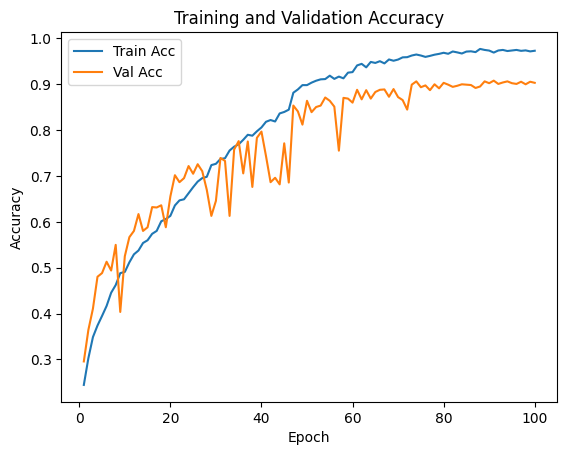

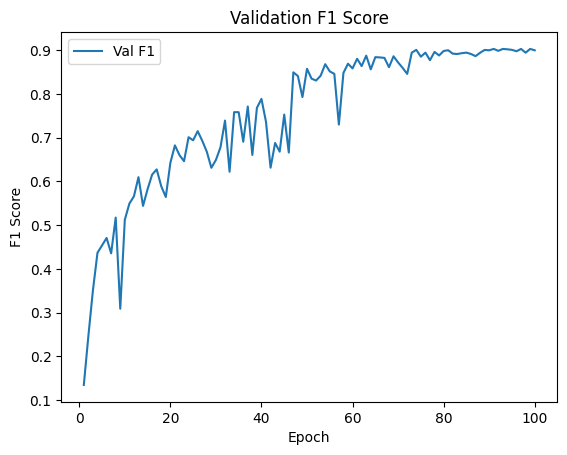

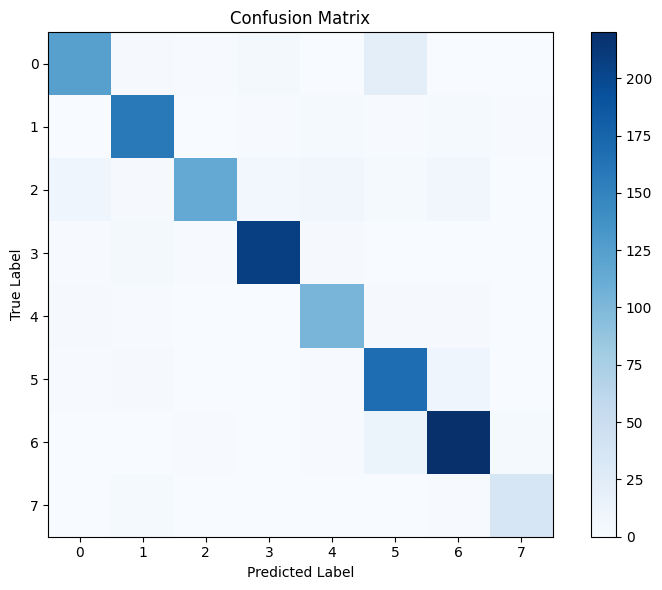

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

# ==== Configuration ====
BATCH_SIZE = 4
LR = 1e-4
EPOCHS = 100
VAL_SPLIT = 0.2
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ==== Prepare data ====
# Load your actual data here
# features = np.load('features.npy')
# labels = np.load('labels.npy')

# Dummy placeholders for testing purposes (remove when using real data)
# features = np.random.rand(3000, 128, 128, 5).astype(np.float32)
# labels = np.random.randint(0, 7, size=(3000,)).astype(np.int64)

features = features.astype(np.float32)
labels = labels.astype(np.int64).reshape(-1)

X = torch.from_numpy(features).permute(0, 3, 1, 2).float()  # (N, C, H, W)
y = torch.from_numpy(labels)

dataset = TensorDataset(X, y)
val_size = int(len(dataset) * VAL_SPLIT)
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

# ==== Simple CNN Model ====
class ImprovedCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.conv_block4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Dropout(0.4)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 8)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.classifier(x)
        return F.log_softmax(x, dim=1)

model = ImprovedCNN().to(DEVICE)

# ==== Loss, Optimizer, Scheduler ====
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# ==== Training & Evaluation Functions ====
def train_epoch(loader):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for inputs, targets in loader:
        inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = outputs.argmax(dim=1)
        correct += (preds == targets).sum().item()
        total += targets.size(0)
    return running_loss / total, correct / total

def eval_epoch(loader):
    model.eval()
    running_loss, all_preds, all_targets = 0.0, [], []
    with torch.no_grad():
        for inputs, targets in loader:
            inputs, targets = inputs.to(DEVICE), targets.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            running_loss += loss.item() * inputs.size(0)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    acc = (np.array(all_preds) == np.array(all_targets)).mean()
    f1 = f1_score(all_targets, all_preds, average='macro')
    return running_loss / len(all_targets), acc, f1, all_preds, all_targets

# ==== Main Training Loop ====
best_val_acc = 0.0
best_val_f1 = 0.0
train_losses, val_losses = [], []
train_accs, val_accs, val_f1s = [], [], []

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train_epoch(train_loader)
    val_loss, val_acc, val_f1, _, _ = eval_epoch(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    val_f1s.append(val_f1)

    print(f"Epoch {epoch}/{EPOCHS}"
          f" - Train loss: {train_loss:.4f}, Train acc: {train_acc:.4f}"
          f" - Val loss: {val_loss:.4f}, Val acc: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    scheduler.step(val_loss)

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_simple_cnn_acc.pth')
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        torch.save(model.state_dict(), 'best_simple_cnn_f1.pth')

print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Best Validation F1 Score: {best_val_f1:.4f}")

# ==== Plot Accuracy ====
plt.figure()
plt.plot(range(1, EPOCHS + 1), train_accs, label='Train Acc')
plt.plot(range(1, EPOCHS + 1), val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# ==== Plot F1 Score ====
plt.figure()
plt.plot(range(1, EPOCHS + 1), val_f1s, label='Val F1')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score')
plt.legend()
plt.show()

# ==== Confusion Matrix ====
_, _, _, all_preds, all_targets = eval_epoch(val_loader)
cm = confusion_matrix(all_targets, all_preds)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [str(i) for i in range(cm.shape[0])]
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
